# Weather Station Clustering 

##Hierarchical Clustering using python & scikit-learn¶

Created by: Saeed Aghabozorgi, Polong Lin

### About the dataset

Environment Canada		  
Monthly Values for June - 2015	  	
		
Legend  		
Stn_Name::::	Station Name  
Lat	    ::::	Latitude (North + , degrees)  
Long	::::	Longitude (West - , degrees)  
Prov	::::	Province  
Tm	    ::::	Mean Temperature (Â°C)  
DwTm	::::	Days without Valid Mean Temperature  
D	    ::::	Mean Temperature difference from Normal (1981-2010) (Â°C)  
Tx	    ::::	Highest Monthly Maximum Temperature (Â°C)  
DwTx	::::	Days without Valid Maximum Temperature  
Tn	    ::::	Lowest Monthly Minimum Temperature (Â°C)  
DwTn	::::	Days without Valid Minimum Temperature  
S	    ::::	Snowfall (cm)  
DwS	    ::::	Days without Valid Snowfall  
S%N	    ::::	Percent of Normal (1981-2010) Snowfall  
P	    ::::	Total Precipitation (mm)  
DwP	    ::::	Days without Valid Precipitation  
P%N	    ::::	Percent of Normal (1981-2010) Precipitation  
S_G  	::::	Snow on the ground at the end of the month (cm)  
Pd	    ::::	Number of days with Precipitation 1.0 mm or more  
BS	    ::::	Bright Sunshine (hours)  
DwBS	::::	Days without Valid Bright Sunshine  
BS%  	::::	Percent of Normal (1981-2010) Bright Sunshine  
HDD 	::::	Degree Days below 18 Â°C  
CDD	    ::::	Degree Days above 18 Â°C  
Stn_No	::::	Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).  
NA	    ::::	Not Available  

### 1-Download data into your Data Scientist Workbench

In [33]:
!wget -O /resources/weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

--2015-10-13 01:16:24--  https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.box.com (ibm.box.com)... 74.112.184.85, 74.112.185.182
Connecting to ibm.box.com (ibm.box.com)|74.112.184.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv [following]
--2015-10-13 01:16:24--  https://ibm.app.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.app.box.com (ibm.app.box.com)... 74.112.184.87, 74.112.185.87
Connecting to ibm.app.box.com (ibm.app.box.com)|74.112.184.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/6FOeZOCZxU7T1ZvBZFACsWgsc9127CiesE6fsJ-TLHHt5PiCig6V8j3DUDA49BTrvthWwoV2YpyTcbkjyVr4tfjszj4WRVeA2o97POCPmDBMoFxpErfFybgKKUrujs6ksXq3XNKJQpklODZmANYR7iVjRqo7fkjoMIMfxRLzhLMkiCMvCzr1Y0_4lHfyGuXPla61o1-xc563pv-apt61EsAUDKrAargU2--zbAtNQb5U0HZRKRrA-ePqeQrNEUKbblvm9J9-zw6GCY

### 2- Load the dataset

In [34]:
import csv
import pandas as pd
import numpy as np

filename='/resources/weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,0,0,0,NaN,178.8,0,NaN,0,12,NaN,...
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,0,0,0,0,258.6,0,104,0,12,NaN,...
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,9,0,9,NaN,264.6,9,NaN,NaN,11,NaN,...
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,2,0,2,NaN,168.4,2,NaN,NaN,11,NaN,...


### 3- Data Cleaning

In [35]:
print len(pdf)
pdf = pdf[pd.notnull(pdf["Tm"]) ]
pdf = pdf[np.isfinite(pdf['Tm'])]
pdf = pdf.reset_index(drop=True)
print len(pdf)
pdf.head(5)

1341
1256


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,0,0,0,NaN,178.8,0,NaN,0,12,NaN,...
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,0,0,0,0,258.6,0,104,0,12,NaN,...
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,9,0,9,NaN,264.6,9,NaN,NaN,11,NaN,...
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,2,0,2,NaN,168.4,2,NaN,NaN,11,NaN,...
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NaN,13.1,0,1.9,0,NaN,NaN,NaN,81.0,8,NaN,NaN,12,NaN,...


In [36]:
print len(pdf)

1256


### 4- Data Visualization

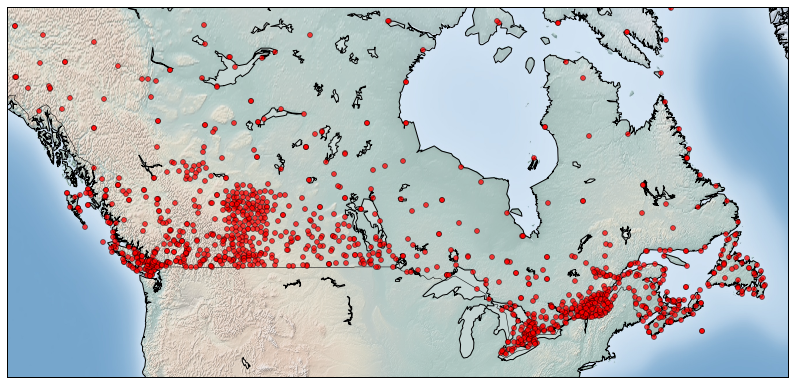

In [37]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]
pdf = pdf.reset_index(drop=True)
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



### 5- Data Sampling

In [38]:
import random
my_randoms = random.sample(xrange(len(pdf)), 30)
hpdf = pdf.ix[my_randoms,:]
hpdf = hpdf.reset_index()
hpdf

,index,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,
0,48,GOLD RIVER TOWNSITE,49.779,-126.055,BC,7.5,0,4.2,16.0,0,-3.0,0,0.0,0,0,286.2,0,100,0,15,...
1,755,PEMBROKE CLIMATE,45.860,-77.252,ON,-18.0,0,NaN,-2.9,0,-31.3,0,NaN,NaN,NaN,23.5,1,NaN,NaN,10,...
2,784,CHATHAM WPCP,42.390,-82.215,ON,-14.4,19,-12.0,-5.0,19,-26.0,19,2.0,19,NaN,2.0,19,NaN,NaN,2,...
3,1112,ST PAUL ISLAND (AUT),47.233,-60.144,NS,-7.6,0,NaN,4.7,0,-20.8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
4,193,CASTLEGAR BCHPA DAM,49.343,-117.774,BC,4.0,0,3.7,12.5,0,-3.0,0,0.0,0,0,30.6,0,69,0,8,...
5,563,BEECHY,50.832,-107.311,SK,-13.4,0,-4.2,3.0,0,-34.0,0,16.1,0,206,18.9,0,222,21,6,...
6,1121,YARMOUTH A,43.827,-66.088,NS,-7.4,0,NaN,4.8,0,-17.0,0,135.1,0,NaN,149.9,1,NaN,28,18,...
7,1126,NEW GLASGOW,46.409,-63.350,PE,-13.8,5,-6.6,-1.5,5,-28.5,5,141.0,5,NaN,141.0,5,NaN,180,9,...
8,746,CORNWALL,45.016,-74.749,ON,-14.4,0,-7.9,-2.0,0,-25.0,0,103.0,0,269,103.0,0,171,61,15,...
9,400,HUSSAR AGDM,51.183,-112.500,AB,-8.2,0,NaN,12.6,0,-20.9,0,NaN,NaN,NaN,4.3,5,NaN,NaN,2,...


### 6- Data Clustering using average temperature

In [41]:

#Normalization
from sklearn.preprocessing import normalize
import pylab
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot 
%matplotlib inline
Temper = np.asarray( hpdf['Tm'])

nx = normalize(Temper.astype(float), axis=1)
x = nx[0]
D = scipy.zeros([x.size,x.size])
for i in range(x.size):
    for j in range(x.size):
        D[i,j] = abs(x[i] - x[j])
Y = sch.linkage(D, method='centroid')



### 7- Plot the first dendrogram

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


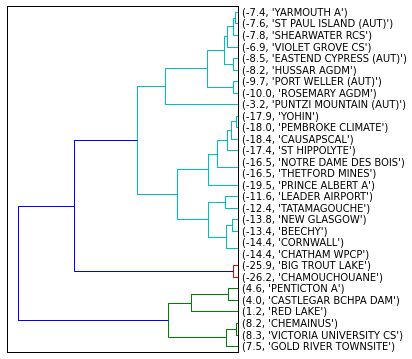

In [42]:
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])
lb = zip(map(lambda x: round(x,2),Temper[Z1['leaves']]),hpdf['Stn_Name'][Z1['leaves']])
ax1.set_yticklabels(lb)
fig.show()

### 8-Clustering based on location and temperature

In [43]:
#Normalization
from sklearn.preprocessing import normalize
import pylab
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot 
%matplotlib inline


x = normalize(np.asarray( hpdf['Tm']).astype(float), axis=1)[0]
y = normalize(np.asarray( hpdf['Tn']).astype(float), axis=1)[0]
z = normalize(np.asarray( hpdf['Tx']).astype(float), axis=1)[0]
xm = normalize(np.asarray( hpdf['xm']).astype(float), axis=1)[0]
ym = normalize(np.asarray( hpdf['ym']).astype(float), axis=1)[0]

p=zip(x,y,z,xm,ym)


D = scipy.zeros([x.size,x.size])
for i in range(x.size):
    for j in range(x.size):
        D[i,j] = scipy.spatial.distance.euclidean(p[i], p[j])
        #abs(x[i] - x[j])
Y = sch.linkage(D, method='centroid')

### 9-Visualization dendrogram.

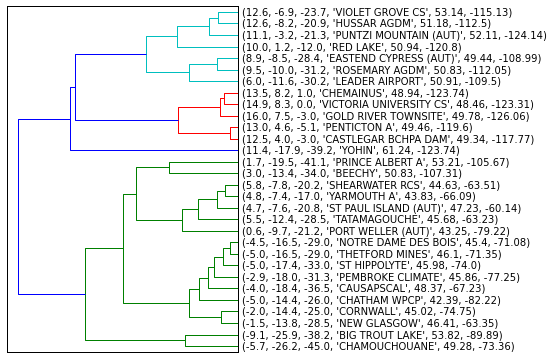

In [44]:

fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])
lb=zip(map(lambda x: round(x,2),hpdf.Tx[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tm[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tn[Z1['leaves']]), \
       hpdf['Stn_Name'][Z1['leaves']],\
       map(lambda x: round(x,2),hpdf.Lat[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Long[Z1['leaves']]) \
      )
ax1.set_yticklabels(lb)
fig.show()

### 10- Clustering results (Labels)

In [45]:
labels = sch.fcluster(Y, 0.8*D.max(), 'distance')
hpdf["Clus_hier"]=labels-1
clusterNum=labels.max()
print (hpdf.Clus_hier)


0     4
1     1
2     1
3     2
4     4
5     3
6     2
7     1
8     1
9     5
10    5
11    6
12    4
13    2
14    5
15    1
16    4
17    5
18    1
19    0
20    5
21    1
22    0
23    1
24    5
25    2
26    4
27    5
28    2
29    3
Name: Clus_hier, dtype: int32


### 11-Visualization if clusters

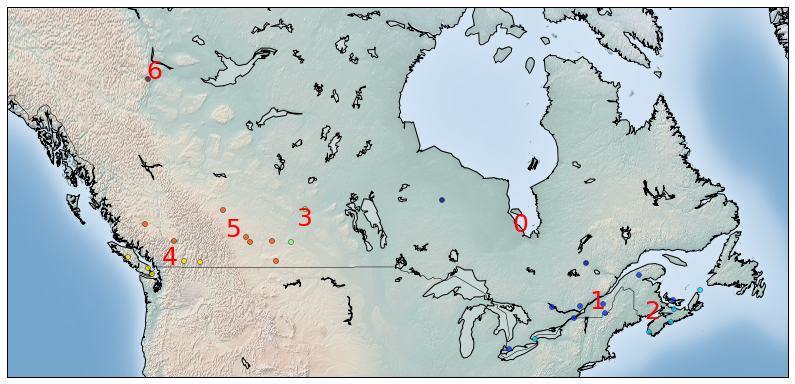

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in hpdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.float(row.Clus_hier)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster=hpdf[["Stn_Name","Tm","xm","ym","Clus_hier"]][hpdf.Clus_hier==i]
    cenx=np.mean(cluster.xm) 
    ceny=np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    #print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))